# 웹크롤링(네이버 뉴스기사)
- 2020.09.04 ~ 2020.09.11까지
- keyword는 코로나+배달

In [6]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
url="https://search.naver.com/search.naver?&where=news&query=%EC%BD%94%EB%A1%9C%EB%82%98%20%EB%B0%B0%EB%8B%AC&sm=tab_pge&sort=0&photo=0&field=1&reporter_article=&pd=1&ds=2020.09.04&de=2020.09.11&docid=&nso=so:r,p:1w,a:t&mynews=0&cluster_rank=19&start={}&refresh_start=0"
#keword = 코로나 + 배달
# 페이지 : start{}

DATE=[]
TITLE=[]
CONTENT=[]
for i in range(1,50,10):
    URL=url.format(i)
    resp=requests.get(URL)
    soup=BeautifulSoup(resp.content, 'html.parser')
    li_tag=soup.find('ul', class_='type01').find_all('li')
    for j in li_tag:
        try:
            naver_news=j.find('dl').find('dd', class_='txt_inline').find('a').text
            if naver_news == '네이버뉴스':
                news_url=j.find('dl').find('dd', class_='txt_inline').find('a')['href']
                detail_resp = requests.get(news_url)
                detail_soup = BeautifulSoup(detail_resp.content, 'html.parser')
                date = detail_soup.find('span',class_='t11').text[:10]
                title = detail_soup.find('div',class_='content').find('h3').text.strip()
                print(date)
                print(title)
                content = detail_soup.find('div',class_='_article_body_contents').text.strip()
                content = re.sub('\/\/ flash 오류를 우회하기 위한 함수 추가\nfunction _flash_removeCallback\(\) \{\}','',content).strip()
                print(content)
                
                DATE.append(date)
                TITLE.append(title)
                CONTENT.append(content)
        except:
            pass

2020.09.10
코로나19로 간편식·배달음식 인기…'식품위생법' 위반 72곳 적발
코로나19 장기화로 이동이 줄고 비대면 소비가 활성화하면서, 가정간편식과 배달음식 수요가 급증하고 있습니다.얼마나 잘 운영되고 있는지 식품의약품안전처가 점검했습니다. 17개 시·도와 함께 지난달 12일부터 이달 4일까지 했습니다. 그랬더니, 가정간편식 업체와 배달음식점 4,540곳을 점검한 결과 식품위생법 위반 업소 72곳이 적발됐습니다. 유통기한 경과 제품 보관·판매·사용 12곳, 건강진단 미시행 20곳, 위생적 취급기준 위반 7곳, 자가품질검사 미시행 22곳 등이 적발됐습니다.생산·작업 서류 미보관 4곳, 면적변경 미신고 3곳, 위생교육 미이수·보관기준 위반 4곳도 있었습니다.위생 점검과 함께 즉석조리식품 등 가정간편식 63건을 수거해 식중독균 등을 검사한 결과, 2건이 부적합판정을 받았습니다.적발된 업체는 관할 지자체가 행정처분 등 조치하고 3개월 이내 다시 점검해 개선 여부를 확인할 예정입니다.식약처는 "배달음식점 등 안전관리를 더 강화할 예정"이라며 "업체 스스로도 경각심을 갖고 식품 위생과 안전에 최선을 다해달라"고 밝혔습니다.식약처는 코로나19 집단감염 확산을 막기 위해 음식점이나 카페 방문 시 손 씻기, 거리두기, 식사 전·후 및 대화할 땐 마스크 착용, 배달·포장 활성화 등을 꼭 실천해달라고 당부했습니다.(JTBC 온라인 이슈팀)한류경 기자 (han.ryukyoung@jtbc.co.kr)▶ JTBC 연속토론｜'코로나 재확산 논쟁' 영상보기 ▶ 시청자와 함께! JTBC 뉴스 제보하기▶ 네이버에서 JTBC 뉴스 채널 구독하기Copyright by JTBC(http://jtbc.joins.com) All Rights Reserved. 무단 전재 및 재배포 금지
2020.09.09
코로나에 직접 배달 치킨집 사장, 음주운전 차량에 치여 사망
[앵커] 오늘 새벽 인천에서 치킨집을 운영하는 50대 가장이 빗길에 직접 배달에 나섰다가 음주 운전 차량에 치여 끝내 숨졌습니다

In [7]:
df=pd.DataFrame()
df['date']=DATE
df['title']=TITLE
df['content']=CONTENT

In [8]:
df.head(3)

,date,title,content
0,2020.09.10,코로나19로 간편식·배달음식 인기…'식품위생법' 위반 72곳 적발,"코로나19 장기화로 이동이 줄고 비대면 소비가 활성화하면서, 가정간편식과 배달음식 ..."
1,2020.09.09,"코로나에 직접 배달 치킨집 사장, 음주운전 차량에 치여 사망",[앵커] 오늘 새벽 인천에서 치킨집을 운영하는 50대 가장이 빗길에 직접 배달에 나...
2,2020.09.10,코로나19에 배달 쑥쑥…백판지 제지株 '高高',"백판지 매출 비중 86.9% 세하, 거리두기 2단계 후 34.6%↑온라인 음식배달 ..."


## 0. 데이터 전처리
- 한글만 남기기
- date컬럼 타입변경

In [9]:
df.to_csv("C:/Users/lg/Desktop/00study/코로나네이버웹크롤링.csv", index=False)
#여기서 index=False를 설정해야 unnamed가 안나옴

In [10]:
#date의 데이터 타입변경
#pd.to_datetime(컬럼명.str.replace(".","-"))
df['date']=pd.to_datetime(df['date'].str.replace(".","-"))
df

,date,title,content
0,2020-09-10,코로나19로 간편식·배달음식 인기…'식품위생법' 위반 72곳 적발,"코로나19 장기화로 이동이 줄고 비대면 소비가 활성화하면서, 가정간편식과 배달음식 ..."
1,2020-09-09,"코로나에 직접 배달 치킨집 사장, 음주운전 차량에 치여 사망",[앵커] 오늘 새벽 인천에서 치킨집을 운영하는 50대 가장이 빗길에 직접 배달에 나...
2,2020-09-10,코로나19에 배달 쑥쑥…백판지 제지株 '高高',"백판지 매출 비중 86.9% 세하, 거리두기 2단계 후 34.6%↑온라인 음식배달 ..."
3,2020-09-10,코로나 사태로 직접 배달 나섰다가…음주운전 차량에 참변,[앵커] 어제 새벽 인천에서 치킨집을 운영하는 50대 가장이 빗길에 직접 배달에 나...
4,2020-09-10,코로나19로 배달 자제 안내문 걸린 한강공원,(서울=뉴스1) 황기선 기자 = 10일 서울 여의도한강공원 배달존에 '배달 주문 자...
5,2020-09-10,"코로나發 급변하는 배달시장 ""주도권 잡아라""","배달앱 사용량 25% 급증, 탄산음료 매출도 덩달아 증가전통시장도 배달, 빨라지는 ..."
6,2020-09-10,코로나 위기를 기회로…“궁을 배달해 드립니다”,‘궁중문화축전’ 앞둔 한국문화재재단 진옥섭 이사장[경향신문] 진옥섭 한국문화재재단 ...
7,2020-09-07,"커피빈, 코로나19로 배달서비스 확대…매출 154% 증가","주거 단지 입점 매장 배달주문이 41%…""집콕족 주문 증가""(서울=연합뉴스) 이한승..."
8,2020-09-09,코로나 확산에 지자체 운영 '공공 배달앱' 큰 호응,동영상 뉴스\n\n\n\n\n\n\n\t\n\t<앵커>코로나19 확산과 함께 배달 ...
9,2020-09-09,"강원도 코로나19 경제위기 극복, '민관협력 배달앱' 추진",9월 14일까지 강원도형 민관협력 배달앱 운영사업자 공모[강원CBS 박정민 기자]강...


In [11]:
#전처리   
# 한글 제외 문자 제거
#정규표현식 함수

import re

remove_except_ko=re.compile(r"[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]")

def preprocess(text):
    text=re.sub(remove_except_ko, ' ', text).strip()
    return text  

In [12]:
# 한글 제외 문자 제거
df['content']=df['content'].map(lambda x:preprocess(x))
df['title']=df['title'].map(lambda x: preprocess(x))

In [14]:
df.tail()

,date,title,content
25,2020-09-10,코로나 중앙재난안전대책본부 한강공원 내 음식물 배달 자제 요청 야외감염 ...,강력한 사회적 거리 두기가 장기화하면서 야외로 나가는 사람들이 늘고 있다며 방역 ...
26,2020-09-04,코로나 뉴노멀 음식배달의 두얼굴 가긁인턴,포스트코로나 언택트 확산에 보편화된 음식배달편리함 강점 수요 폭증에 배달 지연 ...
27,2020-09-06,이슈분석 코로나 타고 배달 수요 퀀텀점프,전자신문 코로나 로 이동이 줄어들면서 배달 수요가 크게 증가했다 여기에 사...
28,2020-09-08,코로나 에 식당 안가고 배달시켰다 월 배달앱 결제액 최대,월 한달간 만명이 조 억원 결제거리두기 단계 시행에 식당 감염 ...
29,2020-09-05,코로나 시대 활로는 배달 뿐 프랜차이즈업계 딜리버리 서비스 총력,어려운 시기 고객 확보와 매출 방어 위해 배달 강화코로나 확산을 방지하기 위해 ...


In [18]:
docs=df['content']; docs=list(docs)

## 1. 토큰화(Mecab)

In [24]:
#mecab 토큰화
from konlpy.tag import Mecab
#선언
mecab=Mecab()
mecab_tokens=mecab.pos(df['content'][0])
print(mecab_tokens[:30])

[('코로나', 'NNP'), ('장기', 'NNG'), ('화', 'XSN'), ('로', 'JKB'), ('이동', 'NNG'), ('이', 'JKS'), ('줄', 'VV'), ('고', 'EC'), ('비대', 'VV'), ('면', 'EC'), ('소비', 'NNG'), ('가', 'JKS'), ('활성', 'NNG'), ('화', 'XSN'), ('하', 'XSV'), ('면서', 'EC'), ('가정', 'NNG'), ('간', 'NNB'), ('편식', 'NNG'), ('과', 'JC'), ('배달', 'NNG'), ('음식', 'NNG'), ('수요', 'NNG'), ('가', 'JKS'), ('급증', 'NNG'), ('하', 'XSV'), ('고', 'EC'), ('있', 'VX'), ('습니다', 'EF'), ('얼마나', 'MAG')]


In [60]:
# df['content']=df['content'].map(lambda x:preprocess(x))
df['mecab_tokens']=df['content'].map(lambda x: mecab.pos(x))

In [61]:
df.head(3)

,date,title,content,mecab_tokens
0,2020-09-10,코로나 로 간편식 배달음식 인기 식품위생법 위반 곳 적발,코로나 장기화로 이동이 줄고 비대면 소비가 활성화하면서 가정간편식과 배달음식 ...,"[(코로나, NNP), (장기, NNG), (화, XSN), (로, JKB), (이..."
1,2020-09-09,코로나에 직접 배달 치킨집 사장 음주운전 차량에 치여 사망,앵커 오늘 새벽 인천에서 치킨집을 운영하는 대 가장이 빗길에 직접 배달에 나섰...,"[(앵커, NNG), (오늘, NNG), (새벽, NNG), (인천, NNP), (..."
2,2020-09-10,코로나 에 배달 쑥쑥 백판지 제지,백판지 매출 비중 세하 거리두기 단계 후 온라인 음식배달 ...,"[(백, NR), (판지, NNG), (매출, NNG), (비중, NNG), (세하..."


## 2. 불용어 처리

In [56]:
# 불용어 정의
stopPos = ['JKS','JKC','JKG','JKO','JKB','JKV','JKQ','JC','JX',
           'SF','SE','SS','SP','SSO','SSC','SC','SY','SH','SL','SN',
           'MM','MAG','MAJ']
stopWord = ['저작권자', '무단', '전재', '재', '배포', '금지', '송고', '입니다', '습니다']

In [64]:
df['mecab_tokens'][0]

[('코로나', 'NNP'),
 ('장기', 'NNG'),
 ('화', 'XSN'),
 ('로', 'JKB'),
 ('이동', 'NNG'),
 ('이', 'JKS'),
 ('줄', 'VV'),
 ('고', 'EC'),
 ('비대', 'VV'),
 ('면', 'EC'),
 ('소비', 'NNG'),
 ('가', 'JKS'),
 ('활성', 'NNG'),
 ('화', 'XSN'),
 ('하', 'XSV'),
 ('면서', 'EC'),
 ('가정', 'NNG'),
 ('간', 'NNB'),
 ('편식', 'NNG'),
 ('과', 'JC'),
 ('배달', 'NNG'),
 ('음식', 'NNG'),
 ('수요', 'NNG'),
 ('가', 'JKS'),
 ('급증', 'NNG'),
 ('하', 'XSV'),
 ('고', 'EC'),
 ('있', 'VX'),
 ('습니다', 'EF'),
 ('얼마나', 'MAG'),
 ('잘', 'MAG'),
 ('운영', 'NNG'),
 ('되', 'XSV'),
 ('고', 'EC'),
 ('있', 'VX'),
 ('는지', 'EC'),
 ('식품', 'NNG'),
 ('의', 'JKG'),
 ('약', 'NNG'),
 ('품안', 'NNG'),
 ('전처', 'NNG'),
 ('가', 'JKS'),
 ('점검', 'NNG'),
 ('했', 'XSV+EP'),
 ('습니다', 'EF'),
 ('개', 'NNBC'),
 ('시', 'NNG'),
 ('도와', 'VV+EC'),
 ('함께', 'MAG'),
 ('지난달', 'NNG'),
 ('일', 'NNG'),
 ('부터', 'JX'),
 ('이달', 'NNG'),
 ('일', 'NNG'),
 ('까지', 'JX'),
 ('했', 'VV+EP'),
 ('습니다', 'EF'),
 ('그랬', 'VV+EP'),
 ('더니', 'EC'),
 ('가정', 'NNG'),
 ('간', 'NNB'),
 ('편식', 'NNG'),
 ('업체', 'NNG'),
 ('와', 'JC'),
 ('배달', 

In [67]:
#for i in range(len(df['mecab_tokens'])):
#    for j in range(len(df['mecab_tokens'][i])):
#        temp_x=[]
#        temp_X=[word[0] for word in df['mecab_tokens'][i][jj] if word[1]  not  in stopPos]
#        temp_x=[word for word in df['mecab_tokens'][i][j] if  word not in stopWord]

# for 문이 익숙하지 않으면 한문장 for문을 만들지 말것
# TF-IDF는 텍스트 마이닝 분석방법 중 키워드 추출
# 감정분석은 텍스트 마이닝 분석방법 중 어조/감성분석

In [76]:
TMP = []
for i in range(len(df)):
    tmp = []
    for j in range(len(df['mecab_tokens'][i])):
        if df['mecab_tokens'][i][j][1] not in stopPos:
            tmp.append(df['mecab_tokens'][i][j][0])
    TMP.append(tmp)

In [75]:
len(TMP), len(df)

(30, 30)

In [79]:
df['temp']=TMP

In [80]:
df.head()

,date,title,content,mecab_tokens,temp
0,2020-09-10,코로나 로 간편식 배달음식 인기 식품위생법 위반 곳 적발,코로나 장기화로 이동이 줄고 비대면 소비가 활성화하면서 가정간편식과 배달음식 ...,"[(코로나, NNP), (장기, NNG), (화, XSN), (로, JKB), (이...","[코로나, 장기, 화, 이동, 줄, 고, 비대, 면, 소비, 활성, 화, 하, 면서..."
1,2020-09-09,코로나에 직접 배달 치킨집 사장 음주운전 차량에 치여 사망,앵커 오늘 새벽 인천에서 치킨집을 운영하는 대 가장이 빗길에 직접 배달에 나섰...,"[(앵커, NNG), (오늘, NNG), (새벽, NNG), (인천, NNP), (...","[앵커, 오늘, 새벽, 인천, 치킨, 집, 운영, 하, 는, 대, 가장, 빗길, 배..."
2,2020-09-10,코로나 에 배달 쑥쑥 백판지 제지,백판지 매출 비중 세하 거리두기 단계 후 온라인 음식배달 ...,"[(백, NR), (판지, NNG), (매출, NNG), (비중, NNG), (세하...","[백, 판지, 매출, 비중, 세하, 거리, 두기, 단계, 후, 온라인, 음식, 배달..."
3,2020-09-10,코로나 사태로 직접 배달 나섰다가 음주운전 차량에 참변,앵커 어제 새벽 인천에서 치킨집을 운영하는 대 가장이 빗길에 직접 배달에 나섰...,"[(앵커, NNG), (어제, MAG), (새벽, NNG), (인천, NNP), (...","[앵커, 새벽, 인천, 치킨, 집, 운영, 하, 는, 대, 가장, 빗길, 배달, 나..."
4,2020-09-10,코로나 로 배달 자제 안내문 걸린 한강공원,서울 뉴스 황기선 기자 일 서울 여의도한강공원 배달존에 배달 주문 자제...,"[(서울, NNP), (뉴스, NNG), (황기선, NNP), (기자, NNG), ...","[서울, 뉴스, 황기선, 기자, 일, 서울, 여의도, 한강, 공원, 배, 달존, 배..."


In [82]:
df.to_csv('C:/Users/lg/Desktop/00study/fined_df.csv', index=False)

# TF-IDF using sklearn

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

#선언
tfidv=TfidfVectorizer()

In [2]:
df=pd.read_csv('C:/Users/lg/Desktop/00study/fined_df.csv');df

,date,title,content,mecab_tokens,temp
0,2020-09-10,코로나 로 간편식 배달음식 인기 식품위생법 위반 곳 적발,코로나 장기화로 이동이 줄고 비대면 소비가 활성화하면서 가정간편식과 배달음식 ...,"[('코로나', 'NNP'), ('장기', 'NNG'), ('화', 'XSN'), ...","['코로나', '장기', '화', '이동', '줄', '고', '비대', '면', ..."
1,2020-09-09,코로나에 직접 배달 치킨집 사장 음주운전 차량에 치여 사망,앵커 오늘 새벽 인천에서 치킨집을 운영하는 대 가장이 빗길에 직접 배달에 나섰...,"[('앵커', 'NNG'), ('오늘', 'NNG'), ('새벽', 'NNG'), ...","['앵커', '오늘', '새벽', '인천', '치킨', '집', '운영', '하',..."
2,2020-09-10,코로나 에 배달 쑥쑥 백판지 제지,백판지 매출 비중 세하 거리두기 단계 후 온라인 음식배달 ...,"[('백', 'NR'), ('판지', 'NNG'), ('매출', 'NNG'), ('...","['백', '판지', '매출', '비중', '세하', '거리', '두기', '단계'..."
3,2020-09-10,코로나 사태로 직접 배달 나섰다가 음주운전 차량에 참변,앵커 어제 새벽 인천에서 치킨집을 운영하는 대 가장이 빗길에 직접 배달에 나섰...,"[('앵커', 'NNG'), ('어제', 'MAG'), ('새벽', 'NNG'), ...","['앵커', '새벽', '인천', '치킨', '집', '운영', '하', '는', ..."
4,2020-09-10,코로나 로 배달 자제 안내문 걸린 한강공원,서울 뉴스 황기선 기자 일 서울 여의도한강공원 배달존에 배달 주문 자제...,"[('서울', 'NNP'), ('뉴스', 'NNG'), ('황기선', 'NNP'),...","['서울', '뉴스', '황기선', '기자', '일', '서울', '여의도', '한..."
5,2020-09-10,코로나 급변하는 배달시장 주도권 잡아라,배달앱 사용량 급증 탄산음료 매출도 덩달아 증가전통시장도 배달 빨라지는 ...,"[('배달', 'NNG'), ('앱', 'NNG'), ('사용량', 'NNG'), ...","['배달', '앱', '사용량', '급증', '탄산', '음료', '매출', '덩달..."
6,2020-09-10,코로나 위기를 기회로 궁을 배달해 드립니다,궁중문화축전 앞둔 한국문화재재단 진옥섭 이사장 경향신문 진옥섭 한국문화재재단 이...,"[('궁중', 'NNG'), ('문화', 'NNG'), ('축전', 'NNG'), ...","['궁중', '문화', '축전', '앞둔', '한국', '문화재', '재단', '진..."
7,2020-09-07,커피빈 코로나 로 배달서비스 확대 매출 증가,주거 단지 입점 매장 배달주문이 집콕족 주문 증가 서울 연합뉴스 이한승...,"[('주거', 'NNG'), ('단지', 'NNG'), ('입점', 'NNG'), ...","['주거', '단지', '입점', '매장', '배달', '주문', '집', '족',..."
8,2020-09-09,코로나 확산에 지자체 운영 공공 배달앱 큰 호응,동영상 뉴스 앵커 코로나 확산과 함께 배달 수요가 크게 늘면서...,"[('동영상', 'NNG'), ('뉴스', 'NNG'), ('앵커', 'NNG'),...","['동영상', '뉴스', '앵커', '코로나', '확산', '배달', '수요', '..."
9,2020-09-09,강원도 코로나 경제위기 극복 민관협력 배달앱 추진,월 일까지 강원도형 민관협력 배달앱 운영사업자 공모 강원 박정민 기자 강원...,"[('월', 'NNG'), ('일', 'NNG'), ('까지', 'JX'), ('강...","['월', '일', '강원도', '형', '민관', '협력', '배달', '앱', ..."


In [3]:
docs=list(df['temp'])

#선언 tfidv=TfidfVectorizer()
tfidv = TfidfVectorizer(max_features=100, max_df=0.95, min_df=0)
tfidv=tfidv.fit(docs)
tfidv.transform(docs).toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.10590672],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.03057052, ..., 0.        , 0.        ,
        0.10619264],
       ...,
       [0.        , 0.04568733, 0.        , ..., 0.        , 0.0352065 ,
        0.06735756],
       [0.        , 0.        , 0.04129937, ..., 0.        , 0.        ,
        0.05738454],
       [0.18937365, 0.        , 0.        , ..., 0.        , 0.11492269,
        0.03664528]])

In [4]:
vocab=tfidv.get_feature_names()
vocab

['가능',
 '가맹점',
 '감염증',
 '강화',
 '거리',
 '건수',
 '결과',
 '결제',
 '경우',
 '경제',
 '고객',
 '관계자',
 '구독',
 '금지',
 '급증',
 '기간',
 '기사',
 '네이버',
 '뉴스',
 '다고',
 '다는',
 '단계',
 '대비',
 '대행업체',
 '두기',
 '따르',
 '때문',
 '라고',
 '라이더',
 '매장',
 '매출',
 '면서',
 '무단',
 '문화',
 '민족',
 '밝혔',
 '배달원',
 '배포',
 '백화점',
 '부담',
 '비대',
 '사고',
 '사람',
 '사업',
 '사용',
 '사회',
 '상황',
 '서비스',
 '서울',
 '성장',
 '소비',
 '소비자',
 '수수료',
 '수요',
 '습니다',
 '시간',
 '시작',
 '시장',
 '시행',
 '식품',
 '신종',
 '업계',
 '업체',
 '연합뉴스',
 '오토바이',
 '온라인',
 '올해',
 '요기',
 '운영',
 '위해',
 '음료',
 '음식',
 '이상',
 '이용',
 '이후',
 '인상',
 '전재',
 '제공',
 '조사',
 '주문',
 '증가',
 '지난',
 '지난달',
 '지만',
 '지사',
 '지역',
 '최근',
 '치킨',
 '커피',
 '코로나',
 '쿠팡',
 '탄산',
 '통해',
 '판지',
 '포장',
 '플랫',
 '한다',
 '할인',
 '확대',
 '확산']

In [5]:
TFIDF=pd.DataFrame(tfidv.transform(docs).toarray(), columns=vocab)
TFIDF

,가능,가맹점,감염증,강화,거리,건수,결과,결제,경우,경제,...,쿠팡,탄산,통해,판지,포장,플랫,한다,할인,확대,확산
0,0.000000,0.000000,0.000000,0.065281,0.052953,0.000000,0.173840,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.083033,0.000000,0.000000,0.000000,0.000000,0.105907
1,0.000000,0.000000,0.000000,0.047830,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.030571,0.052365,0.106193,0.033303,0.000000,0.000000,0.029358,0.033303,...,0.000000,0.000000,0.000000,0.818315,0.033303,0.000000,0.000000,0.000000,0.000000,0.106193
3,0.000000,0.000000,0.000000,0.047830,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.143559,0.122954,0.099736,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.099736
5,0.072848,0.000000,0.000000,0.000000,0.000000,0.033156,0.069417,0.000000,0.029229,0.000000,...,0.069417,0.217257,0.000000,0.000000,0.000000,0.115026,0.063479,0.000000,0.033156,0.084580
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.219121,0.000000,0.000000,0.000000,0.000000,0.000000,0.146081,0.000000
7,0.000000,0.000000,0.042227,0.036166,0.058674,0.000000,0.048155,0.000000,0.040553,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046001,0.058674
8,0.000000,0.417345,0.000000,0.000000,0.000000,0.000000,0.084165,0.000000,0.070878,0.080401,...,0.000000,0.000000,0.080401,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.153825
9,0.270943,0.320058,0.000000,0.000000,0.000000,0.000000,0.000000,0.180629,0.000000,0.164424,...,0.000000,0.000000,0.082212,0.000000,0.000000,0.000000,0.236096,0.123058,0.082212,0.000000


<AxesSubplot:>

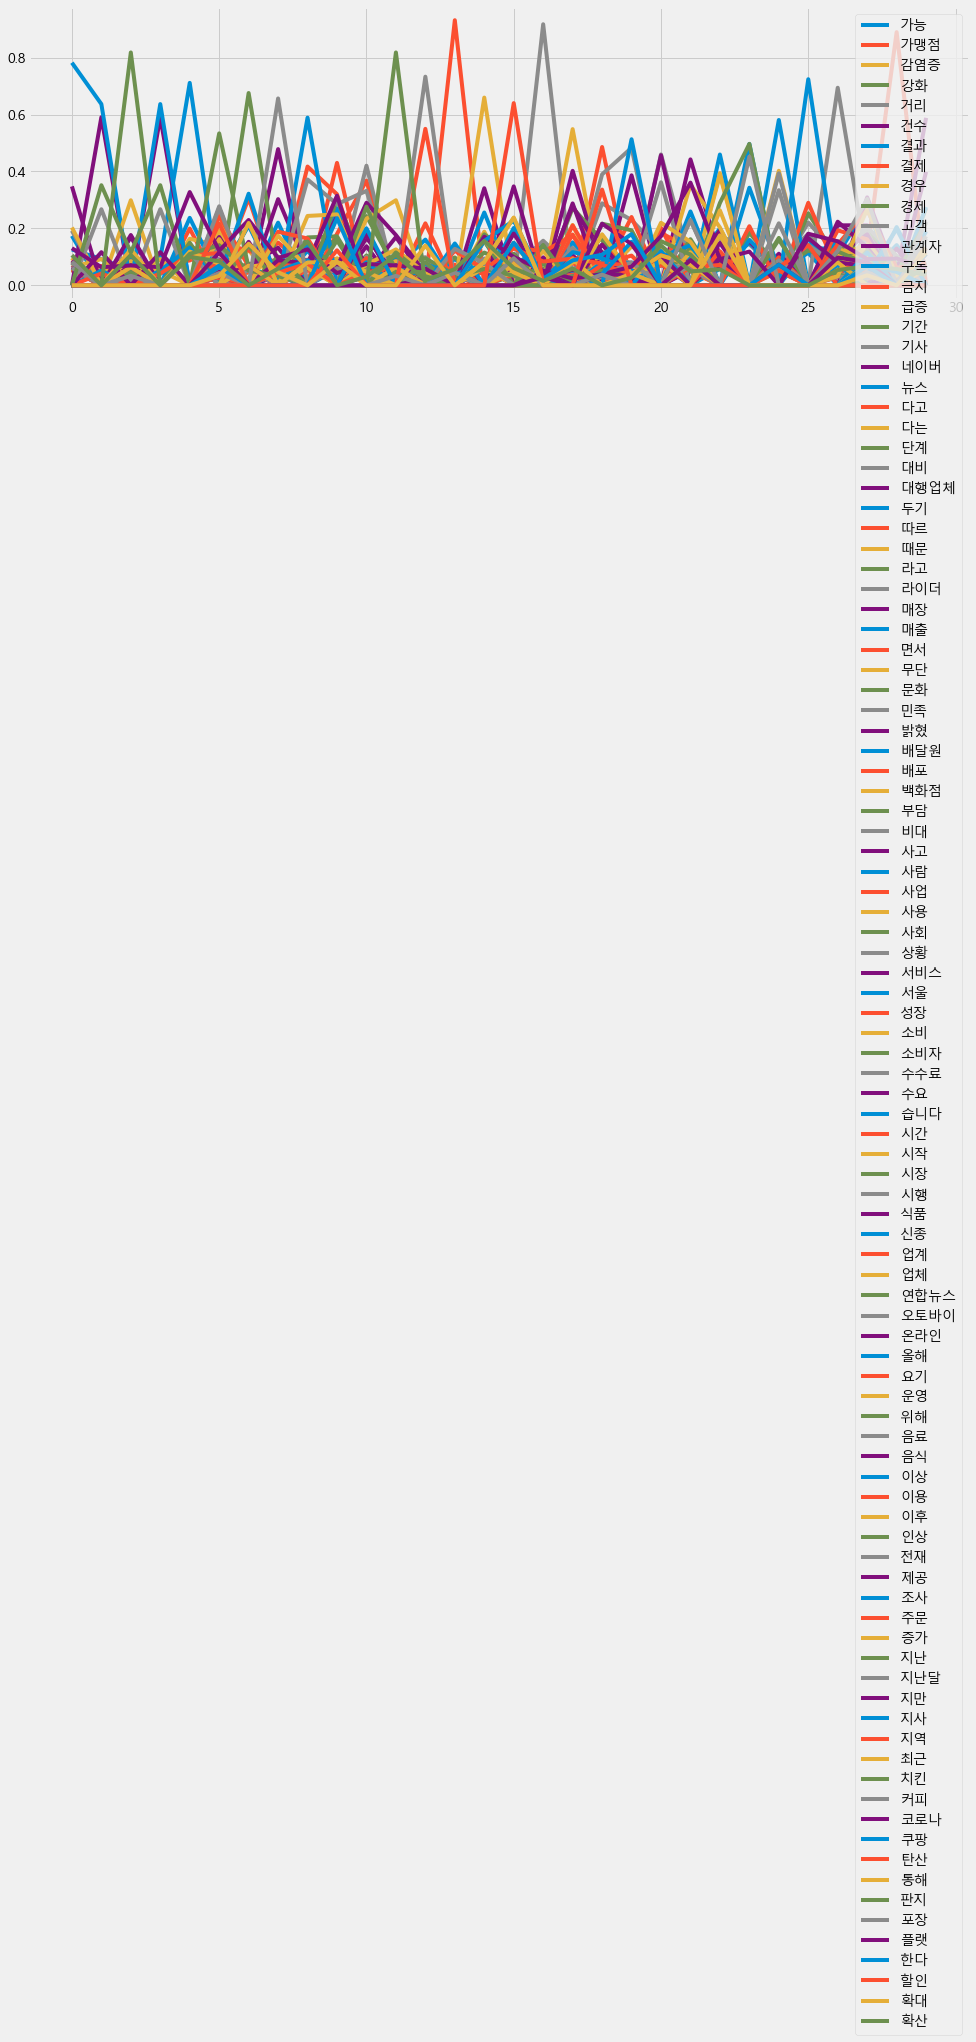

In [106]:
TFIDF.plot(figsize=(15,5))

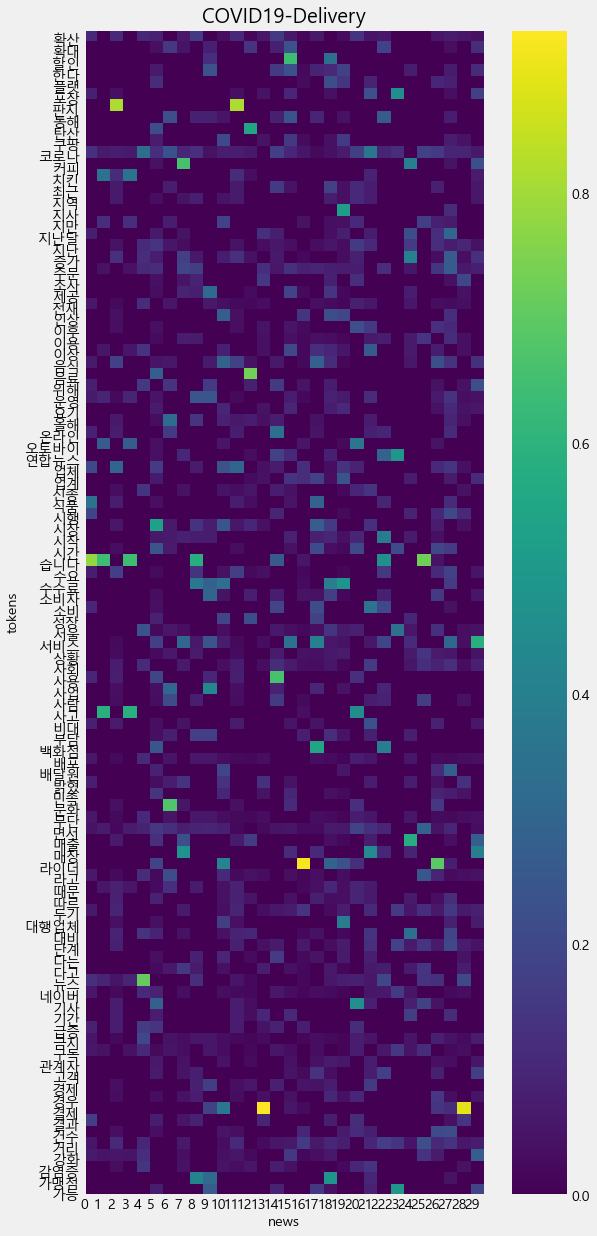

In [110]:
news_token=TFIDF.T
plt.rcParams['figure.figsize']=[8,20]
plt.pcolor(news_token)
plt.xticks(np.arange(0.05, len(news_token.columns),1), news_token.columns)
plt.yticks(np.arange(0.05, len(news_token.index),1), news_token.index)
plt.title('COVID19-Delivery', fontsize=20)
plt.xlabel('news', fontsize=14)
plt.ylabel('tokens', fontsize=14)
plt.colorbar()

plt.show()

# 토픽모델링

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [100]:
docs

["['코로나', '장기', '화', '이동', '줄', '고', '비대', '면', '소비', '활성', '화', '하', '면서', '가정', '간', '편식', '배달', '음식', '수요', '급증', '하', '고', '있', '습니다', '운영', '되', '고', '있', '는지', '식품', '약', '품안', '전처', '점검', '했', '습니다', '개', '시', '도와', '지난달', '일', '이달', '일', '했', '습니다', '그랬', '더니', '가정', '간', '편식', '업체', '배달', '음식점', '곳', '점검', '한', '결과', '식품', '위생법', '위반', '업소', '곳', '적발', '됐', '습니다', '유통', '기한', '경과', '제품', '보관', '판매', '사용', '곳', '건강', '진단', '미', '시행', '곳', '위생', '적', '취급', '기준', '위반', '곳', '자가품', '질', '검사', '미', '시행', '곳', '등', '적발', '됐', '습니다', '생산', '작업', '서류', '미', '보관', '곳', '면적', '변경', '미신고', '곳', '위생', '교육', '미', '이수', '보관', '기준', '위반', '곳', '있', '었', '습니다', '위생', '점검', '즉석조리', '식품', '등', '가정', '간', '편식', '건', '수거', '해', '식중독', '균', '등', '검사', '한', '결과', '건', '부적합', '판정', '받', '았', '습니다', '적발', '된', '업체', '관할', '지자체', '행정', '처분', '등', '조치', '하', '고', '개월', '점검', '해', '개선', '여부', '확인', '할', '예정', '입니다', '식', '약', '처', '배달', '음식점', '등', '안전', '관리', '강화', '할', '예정', '이', '라며', '업체', '스스로', '경

In [114]:
TFIDF_vect=TfidfVectorizer()
doc=df['temp']
topic=TFIDF_vect.fit_transform(doc)

#모델선언
lda=LatentDirichletAllocation(n_components=3, max_iter=5, learning_method='online')
lda_output=lda.fit_transform(topic)

In [115]:
import pyLDAvis
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()
vis=pyLDAvis.sklearn.prepare(lda, topic, TFIDF_vect, mds='tsne')
pyLDAvis.display(vis)

# 감정분석

In [6]:
#사전정의
# 사전 정의
positive_dictionary = pd.read_csv("C:/Users/lg/Desktop/00study/KnuSentiLex-master/positive.csv")
negative_dictionary = pd.read_csv("C:/Users/lg/Desktop/00study/KnuSentiLex-master/negative.csv")

In [7]:
#사전 리스트 전환
pos_list=list(positive_dictionary['word'])
neg_list=list(negative_dictionary['word'])

In [17]:
pos=0
for token in df['temp'][0]:
    if token in pos_list:
        pos+=1

In [18]:
pos

8

In [27]:
pos=0
POS=[]
for i in range(len(df)):
    for token in df['temp'][i]:
        if token in pos_list:
            pos+=1

    POS.append(pos)

In [28]:
len(POS)

30

In [30]:
df['pos']=POS

In [32]:
neg=0
NEG=[]
for i in range(len(df)):
    for token in df['temp'][i]:
        if token in neg_list:
            neg+=1
    
    NEG.append(neg)

In [35]:
len(NEG) 

30

In [36]:
df['neg']=NEG

In [37]:
df

,date,title,content,mecab_tokens,temp,pos,neg
0,2020-09-10,코로나 로 간편식 배달음식 인기 식품위생법 위반 곳 적발,코로나 장기화로 이동이 줄고 비대면 소비가 활성화하면서 가정간편식과 배달음식 ...,"[('코로나', 'NNP'), ('장기', 'NNG'), ('화', 'XSN'), ...","['코로나', '장기', '화', '이동', '줄', '고', '비대', '면', ...",8,12
1,2020-09-09,코로나에 직접 배달 치킨집 사장 음주운전 차량에 치여 사망,앵커 오늘 새벽 인천에서 치킨집을 운영하는 대 가장이 빗길에 직접 배달에 나섰...,"[('앵커', 'NNG'), ('오늘', 'NNG'), ('새벽', 'NNG'), ...","['앵커', '오늘', '새벽', '인천', '치킨', '집', '운영', '하',...",19,19
2,2020-09-10,코로나 에 배달 쑥쑥 백판지 제지,백판지 매출 비중 세하 거리두기 단계 후 온라인 음식배달 ...,"[('백', 'NR'), ('판지', 'NNG'), ('매출', 'NNG'), ('...","['백', '판지', '매출', '비중', '세하', '거리', '두기', '단계'...",28,34
3,2020-09-10,코로나 사태로 직접 배달 나섰다가 음주운전 차량에 참변,앵커 어제 새벽 인천에서 치킨집을 운영하는 대 가장이 빗길에 직접 배달에 나섰...,"[('앵커', 'NNG'), ('어제', 'MAG'), ('새벽', 'NNG'), ...","['앵커', '새벽', '인천', '치킨', '집', '운영', '하', '는', ...",39,41
4,2020-09-10,코로나 로 배달 자제 안내문 걸린 한강공원,서울 뉴스 황기선 기자 일 서울 여의도한강공원 배달존에 배달 주문 자제...,"[('서울', 'NNP'), ('뉴스', 'NNG'), ('황기선', 'NNP'),...","['서울', '뉴스', '황기선', '기자', '일', '서울', '여의도', '한...",39,45
5,2020-09-10,코로나 급변하는 배달시장 주도권 잡아라,배달앱 사용량 급증 탄산음료 매출도 덩달아 증가전통시장도 배달 빨라지는 ...,"[('배달', 'NNG'), ('앱', 'NNG'), ('사용량', 'NNG'), ...","['배달', '앱', '사용량', '급증', '탄산', '음료', '매출', '덩달...",44,71
6,2020-09-10,코로나 위기를 기회로 궁을 배달해 드립니다,궁중문화축전 앞둔 한국문화재재단 진옥섭 이사장 경향신문 진옥섭 한국문화재재단 이...,"[('궁중', 'NNG'), ('문화', 'NNG'), ('축전', 'NNG'), ...","['궁중', '문화', '축전', '앞둔', '한국', '문화재', '재단', '진...",52,117
7,2020-09-07,커피빈 코로나 로 배달서비스 확대 매출 증가,주거 단지 입점 매장 배달주문이 집콕족 주문 증가 서울 연합뉴스 이한승...,"[('주거', 'NNG'), ('단지', 'NNG'), ('입점', 'NNG'), ...","['주거', '단지', '입점', '매장', '배달', '주문', '집', '족',...",54,124
8,2020-09-09,코로나 확산에 지자체 운영 공공 배달앱 큰 호응,동영상 뉴스 앵커 코로나 확산과 함께 배달 수요가 크게 늘면서...,"[('동영상', 'NNG'), ('뉴스', 'NNG'), ('앵커', 'NNG'),...","['동영상', '뉴스', '앵커', '코로나', '확산', '배달', '수요', '...",60,130
9,2020-09-09,강원도 코로나 경제위기 극복 민관협력 배달앱 추진,월 일까지 강원도형 민관협력 배달앱 운영사업자 공모 강원 박정민 기자 강원...,"[('월', 'NNG'), ('일', 'NNG'), ('까지', 'JX'), ('강...","['월', '일', '강원도', '형', '민관', '협력', '배달', '앱', ...",68,139


In [ ]:
# 문장 어조 구하기
#문장 어조 구하기
tone = (pos-neg)/(pos+neg)
tone
tone_list=[]
tone_list.append(tone)
print(tone_list)

In [42]:
df['pos'][0]-df['neg'][0]

-4

In [47]:
TONE=[]

for i in range(len(df)):
    tone=(df['pos'][i]-df['neg'][i])/(df['pos'][i]+df['neg'][i])
    print(tone)
    
    TONE.append(tone)

-0.2
0.0
-0.0967741935483871
-0.025
-0.07142857142857142
-0.23478260869565218
-0.38461538461538464
-0.39325842696629215
-0.3684210526315789
-0.34299516908212563
-0.36607142857142855
-0.3548387096774194
-0.3939393939393939
-0.3925925925925926
-0.40893470790378006
-0.43037974683544306
-0.4226190476190476
-0.44324324324324327
-0.4143920595533499
-0.4046511627906977
-0.40271493212669685
-0.3916849015317287
-0.3907563025210084
-0.38461538461538464
-0.39148073022312374
-0.38922155688622756
-0.37547892720306514
-0.36380255941499084
-0.35855855855855856
-0.36363636363636365


In [49]:
df['tone']=TONE
df

,date,title,content,mecab_tokens,temp,pos,neg,tone
0,2020-09-10,코로나 로 간편식 배달음식 인기 식품위생법 위반 곳 적발,코로나 장기화로 이동이 줄고 비대면 소비가 활성화하면서 가정간편식과 배달음식 ...,"[('코로나', 'NNP'), ('장기', 'NNG'), ('화', 'XSN'), ...","['코로나', '장기', '화', '이동', '줄', '고', '비대', '면', ...",8,12,-0.200000
1,2020-09-09,코로나에 직접 배달 치킨집 사장 음주운전 차량에 치여 사망,앵커 오늘 새벽 인천에서 치킨집을 운영하는 대 가장이 빗길에 직접 배달에 나섰...,"[('앵커', 'NNG'), ('오늘', 'NNG'), ('새벽', 'NNG'), ...","['앵커', '오늘', '새벽', '인천', '치킨', '집', '운영', '하',...",19,19,0.000000
2,2020-09-10,코로나 에 배달 쑥쑥 백판지 제지,백판지 매출 비중 세하 거리두기 단계 후 온라인 음식배달 ...,"[('백', 'NR'), ('판지', 'NNG'), ('매출', 'NNG'), ('...","['백', '판지', '매출', '비중', '세하', '거리', '두기', '단계'...",28,34,-0.096774
3,2020-09-10,코로나 사태로 직접 배달 나섰다가 음주운전 차량에 참변,앵커 어제 새벽 인천에서 치킨집을 운영하는 대 가장이 빗길에 직접 배달에 나섰...,"[('앵커', 'NNG'), ('어제', 'MAG'), ('새벽', 'NNG'), ...","['앵커', '새벽', '인천', '치킨', '집', '운영', '하', '는', ...",39,41,-0.025000
4,2020-09-10,코로나 로 배달 자제 안내문 걸린 한강공원,서울 뉴스 황기선 기자 일 서울 여의도한강공원 배달존에 배달 주문 자제...,"[('서울', 'NNP'), ('뉴스', 'NNG'), ('황기선', 'NNP'),...","['서울', '뉴스', '황기선', '기자', '일', '서울', '여의도', '한...",39,45,-0.071429
5,2020-09-10,코로나 급변하는 배달시장 주도권 잡아라,배달앱 사용량 급증 탄산음료 매출도 덩달아 증가전통시장도 배달 빨라지는 ...,"[('배달', 'NNG'), ('앱', 'NNG'), ('사용량', 'NNG'), ...","['배달', '앱', '사용량', '급증', '탄산', '음료', '매출', '덩달...",44,71,-0.234783
6,2020-09-10,코로나 위기를 기회로 궁을 배달해 드립니다,궁중문화축전 앞둔 한국문화재재단 진옥섭 이사장 경향신문 진옥섭 한국문화재재단 이...,"[('궁중', 'NNG'), ('문화', 'NNG'), ('축전', 'NNG'), ...","['궁중', '문화', '축전', '앞둔', '한국', '문화재', '재단', '진...",52,117,-0.384615
7,2020-09-07,커피빈 코로나 로 배달서비스 확대 매출 증가,주거 단지 입점 매장 배달주문이 집콕족 주문 증가 서울 연합뉴스 이한승...,"[('주거', 'NNG'), ('단지', 'NNG'), ('입점', 'NNG'), ...","['주거', '단지', '입점', '매장', '배달', '주문', '집', '족',...",54,124,-0.393258
8,2020-09-09,코로나 확산에 지자체 운영 공공 배달앱 큰 호응,동영상 뉴스 앵커 코로나 확산과 함께 배달 수요가 크게 늘면서...,"[('동영상', 'NNG'), ('뉴스', 'NNG'), ('앵커', 'NNG'),...","['동영상', '뉴스', '앵커', '코로나', '확산', '배달', '수요', '...",60,130,-0.368421
9,2020-09-09,강원도 코로나 경제위기 극복 민관협력 배달앱 추진,월 일까지 강원도형 민관협력 배달앱 운영사업자 공모 강원 박정민 기자 강원...,"[('월', 'NNG'), ('일', 'NNG'), ('까지', 'JX'), ('강...","['월', '일', '강원도', '형', '민관', '협력', '배달', '앱', ...",68,139,-0.342995


In [68]:
df2=df.copy()

In [69]:
# 날짜를 기준으로 reindex
df2=df2.set_index('date')
#날짜 순서대로
df2.sort_index()

In [79]:
# 시각화
import matplotlib.pyplot as plt
plt.rc("font", family='Malgun Gothic')
plt.rc("axes", unicode_minus=False)
plt.style.use("fivethirtyeight")

In [96]:
count=df[['date', 'tone']]
count=count.set_index('date')
count=count.sort_index()

C:\Users\lg\anaconda3\envs\p36\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date'>

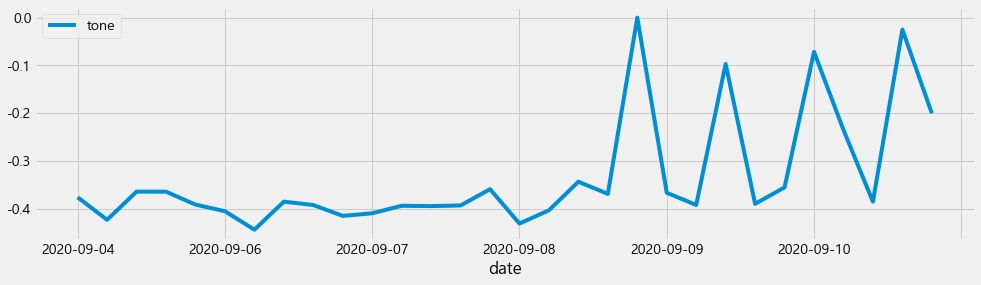

In [99]:
count.plot(figsize=(15,4))

## 과정
- 키워드( 코로나+배달 )을 주제로한 1주 네이버 뉴스 웹크롤링
- 데이터 전처리
- 토큰화 및 불용어 처리
- TF-IDF
- 토픽모델링(LDA)
- 감성분석(어조분석)

## 결과
- 2020년 09월 04일부터 2020년 09월 11일까지 '코로나와 배달'을 주제로한 기사들의 어조는 부정적
- 모든 뉴스기사에 가장 많이 등장한 단어 '결제'/'포장'/'라이더(TF-IDF)
